In [37]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [38]:
path = "/content/gdrive/MyDrive/praktikmML/praktikum11"

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from math import radians, cos


In [40]:
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/PraktikumML/praktikum11/data/gps_dataset.csv')
df.head()

,id,lat,lon,source
0,0,-6.195429,106.802189,cluster_1
1,1,-6.215600,106.805788,cluster_1
2,2,-6.188743,106.848593,cluster_1
3,3,-6.185892,106.804345,cluster_1
4,4,-6.229266,106.829243,cluster_1


In [41]:
coords = df[["lat", "lon"]].to_numpy()
coords_rad = np.radians(coords)


In [42]:
# Parameter DBSCAN
earth_radius_km = 6371.0088
eps_km = 0.8              # Jarak radius tetangga 0.8 km
eps_rad = eps_km / earth_radius_km
min_samples = 8           # Minimum point dalam radius



In [43]:
# Clustering DBSCAN
db = DBSCAN(eps=eps_rad, min_samples=min_samples, metric="haversine")
labels = db.fit_predict(coords_rad)

df["cluster"] = labels
df.head()


,id,lat,lon,source,cluster
0,0,-6.195429,106.802189,cluster_1,0
1,1,-6.215600,106.805788,cluster_1,0
2,2,-6.188743,106.848593,cluster_1,-1
3,3,-6.185892,106.804345,cluster_1,0
4,4,-6.229266,106.829243,cluster_1,-1


In [44]:
def approx_bbox_area_km2(lat_list, lon_list):
    if len(lat_list) == 0:
        return 0
    lat_min, lat_max = min(lat_list), max(lat_list)
    lon_min, lon_max = min(lon_list), max(lon_list)

    mean_lat = (lat_min + lat_max) / 2
    km_lat = 111.32
    km_lon = 111.32 * cos(radians(mean_lat))

    height = (lat_max - lat_min) * km_lat
    width = (lon_max - lon_min) * km_lon

    area = abs(height * width)
    return area if area > 0 else 0.01


In [45]:
clusters = []

for label in sorted(df["cluster"].unique()):
    sub = df[df["cluster"] == label]
    area = approx_bbox_area_km2(sub["lat"], sub["lon"])
    density = len(sub) / area
    clusters.append({
        "cluster": label,
        "jumlah_titik": len(sub),
        "area_km2(bbox)": round(area, 4),
        "density_titik/km2": round(density, 4)
    })

summary = pd.DataFrame(clusters)
summary


,cluster,jumlah_titik,area_km2(bbox),density_titik/km2
0,-1,188,160324.9308,0.0012
1,0,134,30.3813,4.4106
2,1,93,24.2224,3.8394
3,2,85,27.2714,3.1168


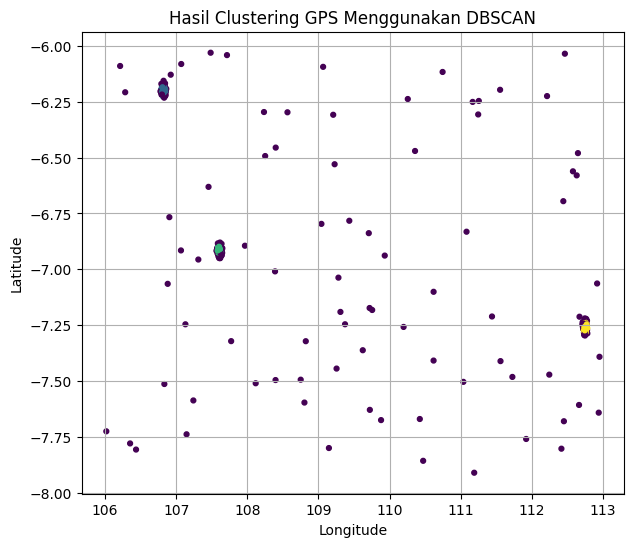

In [46]:
plt.figure(figsize=(7, 6))
plt.scatter(df["lon"], df["lat"], c=df["cluster"], s=12)
plt.title("Hasil Clustering GPS Menggunakan DBSCAN")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


In [47]:
df.to_csv("hasil_dbscan_gps.csv", index=False)
summary.to_csv("ringkasan_cluster.csv", index=False)
print("File hasil disimpan:")
print("- hasil_dbscan_gps.csv")
print("- ringkasan_cluster.csv")

File hasil disimpan:
- hasil_dbscan_gps.csv
- ringkasan_cluster.csv
